In [2]:
"""
Author: LiGorden
Email: likehao1006@gmail.com

Check the performance of model
"""
import os
import gc
import random
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import transforms, datasets

import numpy as np
from sklearn.metrics import roc_auc_score
import shap
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# clear the memory of GPU
torch.cuda.empty_cache()
torch.cuda.empty_cache()
torch.cuda.empty_cache()
torch.cuda.empty_cache()
torch.cuda.empty_cache()
print(gc.collect())

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
data_transform = transforms.Compose([transforms.ToTensor(), ])

0


### Result of using z direction mpa data, split train/test by sample

In [8]:
# ----------------------For directly calculate accurate for ViT 16----------------------
root_result_ViT_16 = os.path.abspath(os.path.join(os.getcwd(), "..", "result", "model_trained", "ViT", "split_by_sample"))
result_ViT_16_pred = np.load(os.path.join(root_result_ViT_16, "pred.npy"))
result_ViT_16_true = np.load(os.path.join(root_result_ViT_16, "true.npy"))
result_ViT_16_time = np.load(os.path.join(root_result_ViT_16, "time_best_epoch.npy"))
result_ViT_16_train_loss = np.load(os.path.join(root_result_ViT_16, "train_loss.npy"))
result_ViT_16_test_loss = np.load(os.path.join(root_result_ViT_16, "test_loss.npy"))

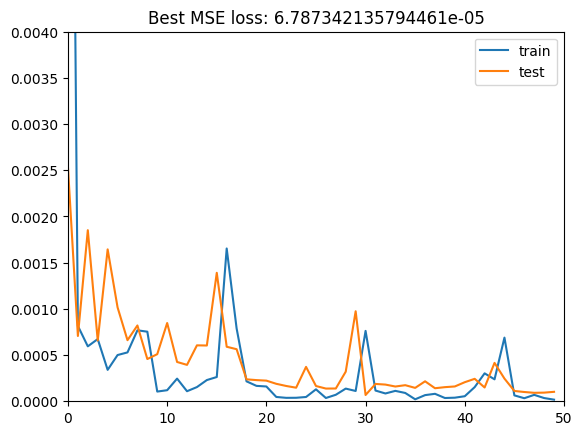

In [9]:
# plot the training/test loss
plt.figure()
plt.title("Best MSE loss: " + str(np.min(result_ViT_16_test_loss)))
plt.xlim((0, len(result_ViT_16_train_loss)))
plt.ylim((0, 0.004))
plt.plot(result_ViT_16_train_loss, label="train")
plt.plot(result_ViT_16_test_loss, label="test")
plt.legend()

In [7]:
len(result_ViT_16_pred)

189

{'whiskers': [<matplotlib.lines.Line2D at 0x1512624f280>,
 'caps': [<matplotlib.lines.Line2D at 0x1512624f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1512623bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1512624fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1512624ffa0>],
 'means': []}

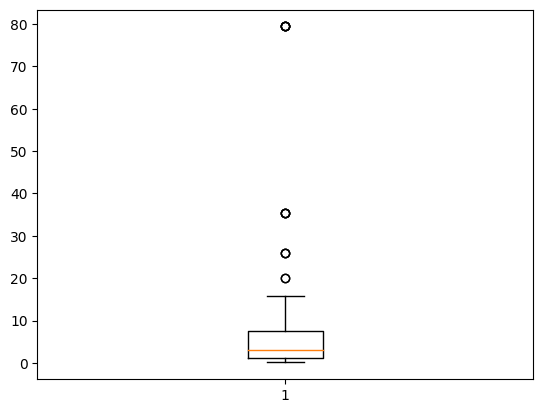

In [8]:
# check the boxplot of relative error
relative_error = abs((result_ViT_16_pred - result_ViT_16_true) / result_ViT_16_true * 100)
plt.boxplot(relative_error)

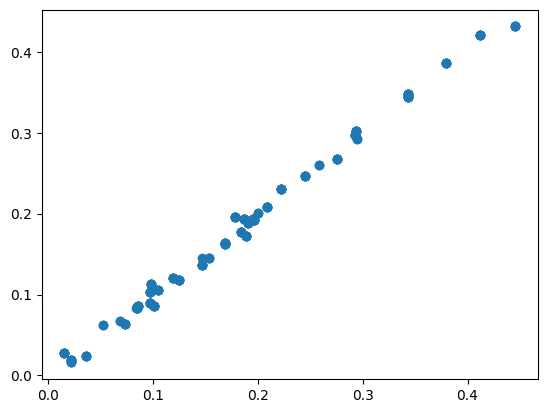

In [14]:
# plot the true value and pred value
avg_relative_error = result_ViT_16_true - result_ViT_16_pred

plt.figure()
plt.scatter(result_ViT_16_true, result_ViT_16_pred)

### Result of using z direction mpa data and elec data, split train/test by sample

In [3]:
# ----------------------For directly calculate accurate for ViT 16----------------------
root_result_ViT_16 = os.path.abspath(os.path.join(os.getcwd(), "..", "result", "model_trained", "ViT_double_branch"))
result_ViT_16_pred = np.load(os.path.join(root_result_ViT_16, "pred.npy"))
result_ViT_16_true = np.load(os.path.join(root_result_ViT_16, "true.npy"))
result_ViT_16_time = np.load(os.path.join(root_result_ViT_16, "time_best_epoch.npy"))
result_ViT_16_train_loss = np.load(os.path.join(root_result_ViT_16, "train_loss.npy"))
result_ViT_16_test_loss = np.load(os.path.join(root_result_ViT_16, "test_loss.npy"))

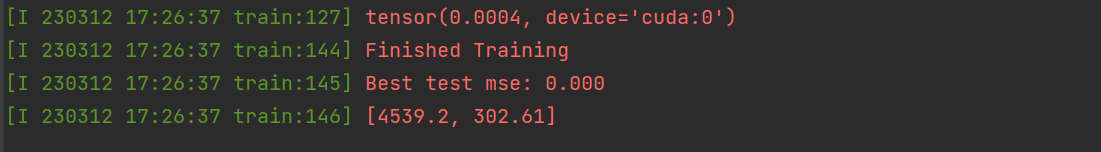

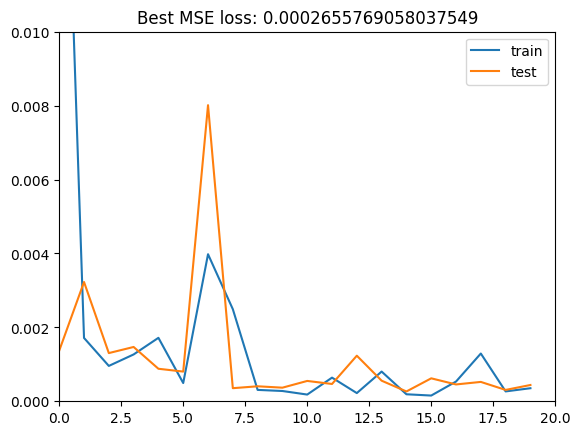

In [6]:
# plot the training/test loss
plt.figure()
plt.title("Best MSE loss: " + str(np.min(result_ViT_16_test_loss)))
plt.xlim((0, len(result_ViT_16_train_loss)))
plt.ylim((0, 0.01))
plt.plot(result_ViT_16_train_loss, label="train")
plt.plot(result_ViT_16_test_loss, label="test")
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x209e8b38340>,
 'caps': [<matplotlib.lines.Line2D at 0x209e8a1f070>,
 'boxes': [<matplotlib.lines.Line2D at 0x209e8b380a0>],
 'medians': [<matplotlib.lines.Line2D at 0x209e8b38790>],
 'fliers': [<matplotlib.lines.Line2D at 0x209e8b38a30>],
 'means': []}

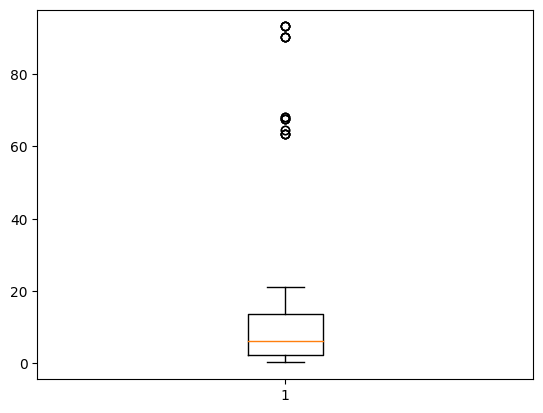

In [7]:
# check the boxplot of relative error
relative_error = abs((result_ViT_16_pred - result_ViT_16_true) / result_ViT_16_true * 100)
plt.boxplot(relative_error)

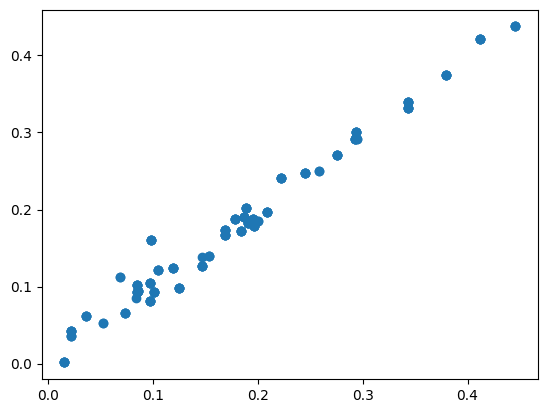

In [8]:
# plot the true value and pred value
avg_relative_error = result_ViT_16_true - result_ViT_16_pred

plt.figure()
plt.scatter(result_ViT_16_true, result_ViT_16_pred)